In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [10]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [11]:
df.columns=["target", "sms"]

In [12]:
df.head(3)

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [13]:
df["target"]=df["target"].replace("ham", 0)
df["target"]=df["target"].replace("spam", 1)

In [14]:
df.head(3)

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [15]:
df.isnull().sum()

target    0
sms       0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
len(df)

5572

In [18]:
df=df.drop_duplicates()

In [19]:
df.shape

(5169, 2)

In [20]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

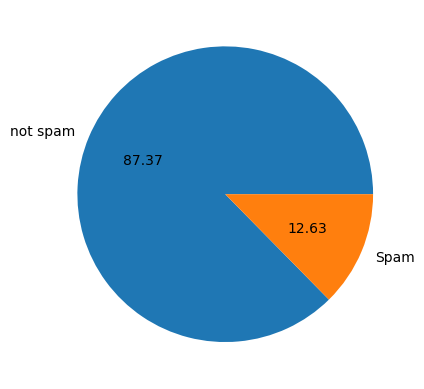

In [21]:
plt.pie(df["target"].value_counts(), labels=["not spam", "Spam"], autopct="%.2f")
plt.show()

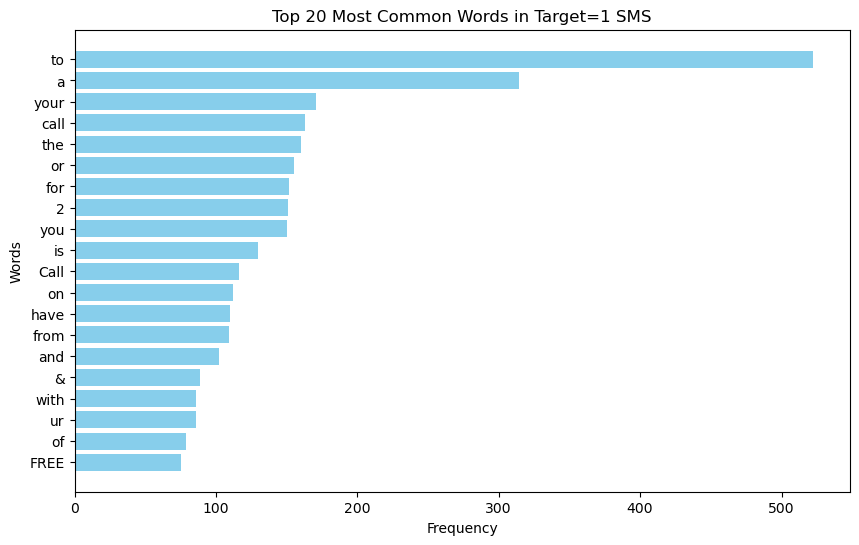

In [27]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Combine all text where 'target' == 1 into a single string
text = " ".join(df.loc[df["target"] == 1, "sms"].astype(str))

# Split text into words and calculate word frequencies
words = text.split()
word_counts = Counter(words)

# Get the most common words
common_words = word_counts.most_common(20)  # Top 20 words

# Separate words and their counts for plotting
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Target=1 SMS')
plt.gca().invert_yaxis() 
plt.show()

In [28]:
import re
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

In [29]:
def remove_punctuations(text):
    text=re.sub(r"[^A-Za-z0-9\s]", "", text)
    return text

In [30]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopword(text):
    stop_words= stopwords.words('english')
    temp_text = word_tokenize(text)
    for word in temp_text:
        if word in stop_words:
            text=text.replace(word, "")
    
    return text

In [31]:
from nltk.stem import PorterStemmer
def Stemming(text):
    ps = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_words = []
    for token in tokens:
        stemmed_token = ps.stem(token)
        stemmed_words.append(stemmed_token)
    return ' '.join(stemmed_words)

In [32]:
def transform(text):
    text=text.lower()
    text=remove_urls(text)
    text=remove_punctuations(text)
    text=remove_stopword(text)
    text=Stemming(text)
    return text

In [33]:
df["transformed"]=df["sms"].apply(transform)

In [34]:
df.head(3)

,target,sms,transformed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong pot crazi avail bugi n great world l...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp w f cup fl tkt 21st my ...


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer()
X=tf.fit_transform(df["transformed"]).toarray()

In [36]:
Y=df["target"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [38]:
print(len(X_train))
print(len(X_test))

4135
1034


In [39]:
from sklearn.naive_bayes import BernoulliNB
bnb_model=BernoulliNB()
bnb_model.fit(X_train, Y_train)

BernoulliNB()

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [41]:
Y_pred=bnb_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision= precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1_Score", f1)

Accuracy 0.9593810444874274
Precision 0.9734513274336283
Recall 0.738255033557047
F1_Score 0.8396946564885496


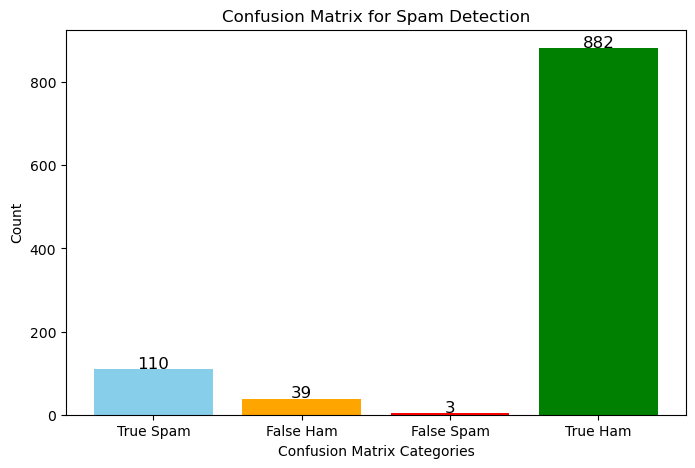

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(Y_test, Y_pred, labels=[1, 0])
categories = ["Spam", "Ham"]
cm_values = cm.flatten()
cm_labels = ["True Spam", "False Ham", "False Spam", "True Ham"]
plt.figure(figsize=(8, 5))
bars = plt.bar(cm_labels, cm_values, color=['skyblue', 'orange', 'red', 'green'])
for bar, value in zip(bars, cm_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(value), ha='center', va='bottom', fontsize=12, color='black')
plt.xlabel("Confusion Matrix Categories")
plt.ylabel("Count")
plt.title("Confusion Matrix for Spam Detection")
plt.show()


In [44]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [45]:
from sklearn.model_selection import cross_val_score
y_train1=lr_model.predict(X_train)
y_test1= lr_model.predict(X_test)
print("Accuracy X_Train", accuracy_score(Y_train, y_train1))
print("Accuracy X_Test", accuracy_score(Y_test, y_test1))
print("Cross_Validation", cross_val_score(lr_model, X_train, Y_train, cv=5).mean())

Accuracy X_Train 0.9579201934703748
Accuracy X_Test 0.9294003868471954
Cross_Validation 0.9318016928657797


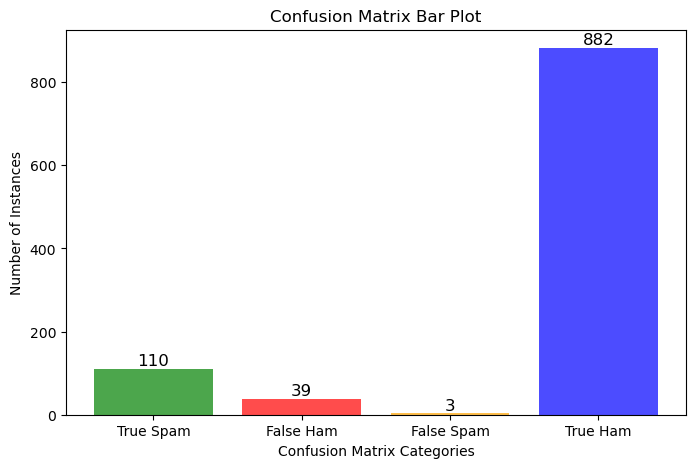

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=[1, 0])

# Extract confusion matrix values
true_positive = cm[0, 0]  # True Spam
false_negative = cm[0, 1]  # False Ham
false_positive = cm[1, 0]  # False Spam
true_negative = cm[1, 1]  # True Ham
categories = ["True Spam", "False Ham", "False Spam", "True Ham"]
values = [true_positive, false_negative, false_positive, true_negative]
colors = ["green", "red", "orange", "blue"]
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=colors, alpha=0.7)
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 1, str(value), ha='center', va='bottom', fontsize=12)
plt.title("Confusion Matrix Bar Plot")
plt.xlabel("Confusion Matrix Categories")
plt.ylabel("Number of Instances")
plt.show()
